Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

## Strojno učenje 2016./2017.

<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

### Laboratorijska vježba 2: Linearni diskriminativni modeli i logistička regresija

(c) 2015-2016 Jan Šnajder, Domagoj Alagić

<i>Verzija: 0.2</i> <br/>
<i>Zadnji put ažurirano: 26. listopada 2016.</i> 

Objavljeno: **26. listopada 2016.**<br>
Rok za predaju: U terminu vježbe u tjednu od **31. listopada 2016.**

### Upute

Druga laboratorijska vježba sastoji se od šest zadataka. Kako bi kvalitetnije, ali i na manje zamoran način usvojili gradivo ovog kolegija, potrudili smo se uključiti tri vrste zadataka: **1)** implementacija manjih algoritama, modela ili postupaka; **2)** eksperimenti s raznim modelima te njihovim hiperparametrima, te **3)** primjena modela na (stvarnim) podatcima. Ovim zadatcima pokrivamo dvije paradigme učenja: učenje izgradnjom (engl. *learning by building*) i učenje eksperimentiranjem (engl. *learning by experimenting*).

U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import scipy as np
import scipy as sp
import sklearn
import mlutils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $+1$, dok za pozitivne primjere predviđa vrijednost $-1$. U tom slučaju, funkcija $f(\mathbf{x})=0$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u našem paketu `mlutils` (`mlutils.py`). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela. 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojim podatcima.


In [2]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [3]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, -1, -1, -1])

[ 1  1  1  1 -1 -1 -1]
[ 1.   0.8  1.4  0.4 -0.6 -0.8 -1.2]
1.0
[[-0.5 -0.1]] [ 2.1]


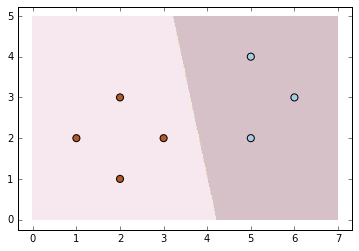

In [4]:
# Vaš kôd ovdje...
rigClass = RidgeClassifier(alpha=0)
#print rigClass
rigClass.fit(seven_X,seven_y)
print rigClass.predict(seven_X)
print rigClass.decision_function(seven_X)
print rigClass.score(seven_X,seven_y)
print rigClass.coef_ , rigClass.intercept_
mlutils.plot_2d_clf_problem(seven_X,seven_y, h = lambda x: rigClass.predict(x))

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0`.

[ 1.   0.8  1.4  0.4 -0.6 -0.8 -1.2]


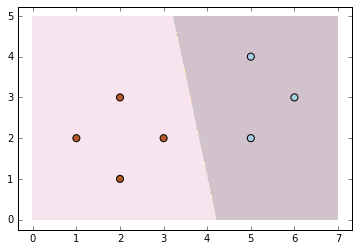

In [5]:
# Vaš kôd ovdje...
linreg = LinearRegression()
linreg.fit(seven_X,seven_y)
print linreg.predict(seven_X)
mlutils.plot_2d_clf_problem(seven_X, seven_y, h = lambda x : linreg.predict(x) >= 0)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $0$ i $1$ umjesto $-1$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [6]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, -1)

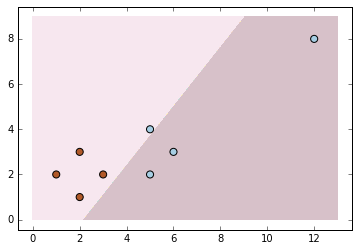

In [7]:
# Vaš kôd ovdje...
rigClass.fit(outlier_X,outlier_y)
mlutils.plot_2d_clf_problem(outlier_X,outlier_y,h=lambda x:rigClass.predict(x))

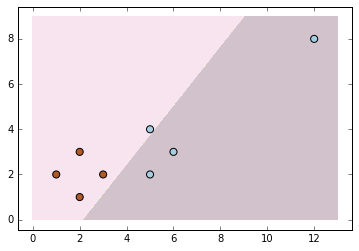

In [8]:
linreg.fit(outlier_X,outlier_y)
mlutils.plot_2d_clf_problem(outlier_X,outlier_y,h = lambda x : linreg.predict(x)>=0)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [9]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, -1)

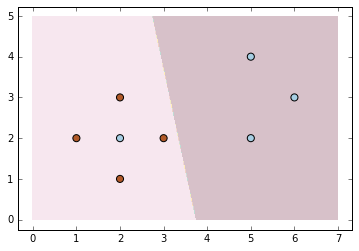

In [10]:
# Vaš kôd ovdje...
rigClass.fit(unsep_X,unsep_y)
mlutils.plot_2d_clf_problem(unsep_X,unsep_y,h = lambda x: rigClass.predict(x))

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Zašto?

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki da je svaka od klasa "zbijena" u jednu grupu.

In [11]:
from sklearn.datasets import make_classification

[2 1 0 0 2 0 2 1 2 0 0 0 0 1 2 2 1 2 0 2 1 2 2 2 2 1 2 2 2 2 1 1 2 2 2 1 1
 1 1 2 0 0 1 1 0 0 0 1 2 1 0 0 0 1 1 1 1 1 0 2 2 2 2 0 0 0 1 1 2 0 0 1 0 1
 2 1 0 0 0 0 2 1 1 2 1 0 0 0 1 1 0 0 2 1 0 2 2 1 2 0]


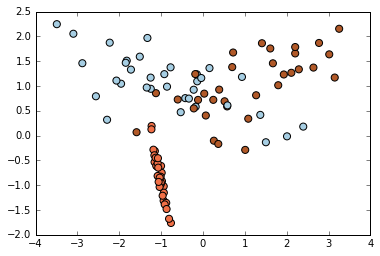

In [12]:
# Vaš kôd ovdje...
inspace_X, outspace_Y = make_classification(n_features=2, n_redundant=0,
                             n_clusters_per_class=1, n_classes=3)
#print inspace_X
print outspace_Y
mlutils.plot_2d_clf_problem(inspace_X,outspace_Y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$ i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema je one-vs-one (OVO). Koja je prednost sheme OVR nad shemom OVO?

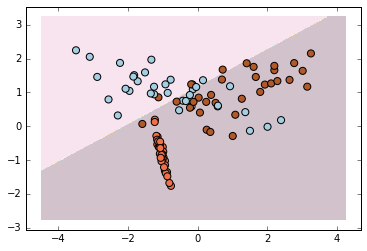

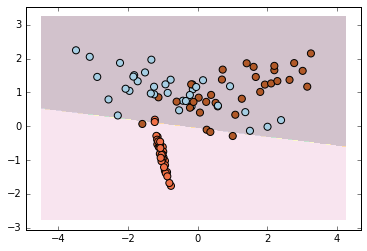

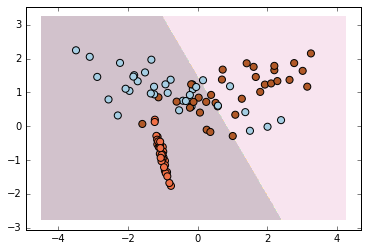

0.85
0.85
1.0


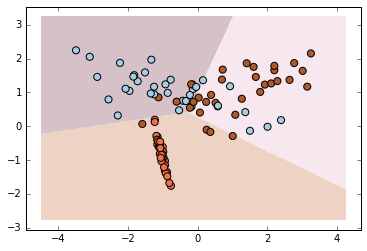

In [47]:
# Vaš kôd ovdje...
y1 = np.array([])
y2 = np.array([])
y3 = np.array([])
for el in outspace_Y:
    if el == 0:
        y1=np.append(y1,1)
        y2=np.append(y2,-1)
        y3=np.append(y3,-1)
    elif el == 1:
        y1=np.append(y1,-1)
        y2=np.append(y2,1)
        y3=np.append(y3,-1)
    elif el == 2:
        y1=np.append(y1,-1)
        y2=np.append(y2,-1)
        y3=np.append(y3,1)
        
#print y1
#print y2
#print y3
h1 = LinearRegression()
h2 = LinearRegression()
h3 = LinearRegression()
h1.fit(inspace_X,y1)
h2.fit(inspace_X,y2)
h3.fit(inspace_X,y3)
mlutils.plot_2d_clf_problem(inspace_X,outspace_Y,h = lambda x: h1.predict(x)>=0)
show()
mlutils.plot_2d_clf_problem(inspace_X,outspace_Y,h = lambda x: h2.predict(x)>=0)
show()
mlutils.plot_2d_clf_problem(inspace_X,outspace_Y,h = lambda x: h3.predict(x)>=0)
show()
#print h1.predict(inspace_X)
#print h2.predict(inspace_X)
#print h3.predict(inspace_X)
h = lambda X : np.array([argmax(j) for j in zip(h1.predict(inspace_X),h2.predict(inspace_X),h3.predict(inspace_X))])
print accuracy_score(outspace_Y,h(inspace_X))
rigClass.fit(inspace_X,outspace_Y)
print accuracy_score(outspace_Y,rigClass.predict(inspace_X))
print accuracy_score(h(inspace_X),rigClass.predict(inspace_X))
mlutils.plot_2d_clf_problem(inspace_X,outspace_Y,h=lambda x : rigClass.predict(x))

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

In [14]:
def sigm(x,alpha=1):
    # Vaš kôd ovdje...
    return 1/(1+exp(-alpha*x))

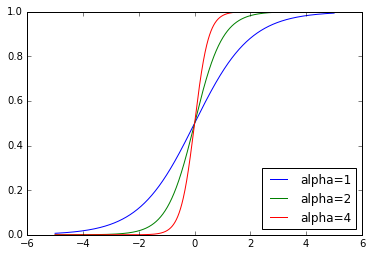

In [15]:
# Vaš kôd ovdje...
x = linspace(-5,5,1000)
#print x
y1 = np.array([sigm(el) for el in x])
plt.plot(x,y1,label='alpha=1')
y2 = np.array([sigm(el,alpha=2) for el in x])
plt.plot(x,y2,label='alpha=2')
y3 = np.array([sigm(el,alpha=4) for el in x])
plt.plot(x,y3,label='alpha=4')
plt.legend(loc=4)
show()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o magnitudi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor regularizacije.

Definirajte pomoćnu funkciju `lr_h(x,w)` koja daje predikciju (izlaz modela) za primjer `x` uz zadane težine `w`.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu. Prilagodite algoritam ili jednostavno redefinirajte oznake u skupu `seven`.

In [16]:
# Vaš kôd ovdje...
def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    w = np.array([])
    #dodaj dummy jedinice X vektoru
    ones = np.array([])
    for i in range(len(X)):
        ones = np.append(ones,1)
    ones = ones[np.newaxis]
    ones = ones.T
    X = np.hstack((ones,X))
    #print X
    #stvori w vektor tezina n+1 dimenzija
    for i in range(np.shape(X)[1]):
        w = np.append(w,0)
    count = 0
    w_iters = np.array([])
    w_iters = np.append(w_iters,w)
    while True:
        count += 1
        #stvori dw promjenu tezina postavi na 0
        old = np.array([])
        for i in range(len(w)):
            old = np.append(old,w[i])
        dw = np.array([])
        for i in range(len(w)):
            dw = np.append(dw,0)
        # Logisticka regularizacija 
        if alpha == 0:
            for i in range(len(X)):
                h = sigm(dot(w.T,X[i]))
                dw = dw + (h - y[i])*X[i]
            w = w - eta*dw
            w_iters = np.vstack((w_iters,w))
        elif alpha != 0:
        # Reguralizirana Logisticka regresija
            for i in range(len(X)):
                h = sigm(dot(w.T,X[i]))
                dw[0] = dw[0] + h - y[i]
                dw[1:] = dw[1:] + (h - y[i])*X[i][1:]
            w[0] = w[0] - eta*dw[0]
            w[1:] = w[1:]*(1 - eta*alpha)  - eta*dw[1:]
            w_iters = np.vstack((w_iters,w))
        diff = cross_entropy_error(X,y,old) - cross_entropy_error(X,y,w)
        flag = False
        if abs(diff) < epsilon:
            print "manji cross entropy od epsilon"
            break
        if count == max_iter:
            print "Dosegnuo max inter"
            break
    if trace == True :
        return w, w_iters
    return w

def lr_h(x,w):
    if np.shape(x)[1]!=len(w):
        ones = np.array([])
        for i in range(len(x)):
            ones = np.append(ones,1)
        ones = ones[np.newaxis]
        ones = ones.T
        x = np.hstack((ones,x))
    h = np.array([])
    for i in range(len(x)):
        predict = sigm(dot(w.T,x[i]))
        h = np.append(h,predict)
    return h

def transform_y(Y):
    y=np.array([])
    for el in seven_y:
        if el == 1:
            y = np.append(y,1)
        elif el == -1:
            y = np.append(y,0)
    return y

def cross_entropy_error(X,y,w):
        return  sklearn.metrics.log_loss(y,lr_h(X,w))

[[2 1]
 [2 3]
 [1 2]
 [3 2]
 [5 2]
 [5 4]
 [6 3]]
[ 1  1  1  1 -1 -1 -1]
manji cross entropy od epsilon
[ 4.45449454 -1.71089242  0.68413507]
[ 0.84772198  0.95627456  0.9838868   0.66598638  0.06112867  0.20368385
  0.02278833]


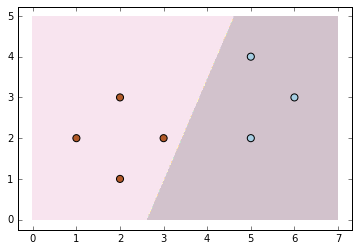

In [17]:
print seven_X
print seven_y
y = transform_y(seven_y)
w,w_iters= lr_train(seven_X,y,max_iter=100000,trace=True)
#print w_iters
print w
print lr_h(seven_X,w)
mlutils.plot_2d_clf_problem(seven_X,y,h = lambda x: lr_h(x,w)>=0.5)
show()

#### (c)

Definirajte funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` koristeći dane težine `w`. Možete iskoristiti funkciju [`metrics.log_loss`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html).

#### (d)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije.

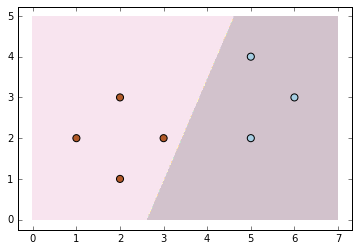

0.135218727202


In [18]:
# Vaš kôd ovdje...
mlutils.plot_2d_clf_problem(seven_X,y,h = lambda x: lr_h(x,w)>=0.5)
show()
print cross_entropy_error(seven_X,y,w)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu (o kojim parametrima) to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (e)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Za izračun pogreške možete koristiti funkciju [`metrics.zero_one_loss`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.zero_one_loss.html#sklearn.metrics.zero_one_loss). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [19]:
from sklearn.metrics import zero_one_loss

[[2 1]
 [2 3]
 [1 2]
 [3 2]
 [5 2]
 [5 4]
 [6 3]]
[ 1.  1.  1.  1.  0.  0.  0.]
manji cross entropy od epsilon
(948, 3)


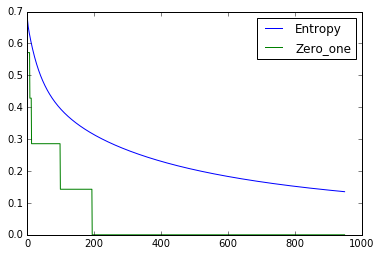

manji cross entropy od epsilon
manji cross entropy od epsilon
manji cross entropy od epsilon
manji cross entropy od epsilon


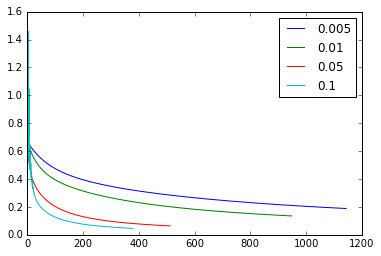

In [20]:
# Vaš kôd ovdje...
print seven_X
print y
w, w_iters = lr_train(seven_X,y,trace=True)
print np.shape(w_iters)
error_iters = np.array([])
error_zero_one = np.array([])
for el in w_iters:
    y_pred=lambda x:lr_h(x,el) >=0.5
    pred = y_pred(seven_X)
    error_iters = np.append(error_iters,cross_entropy_error(seven_X,y,el))
    error_zero_one = np.append(error_zero_one,sklearn.metrics.zero_one_loss(y,pred))
step = linspace(0,len(error_iters),len(error_iters))
plt.plot(step,error_iters,label='Entropy')
plt.plot(step,error_zero_one,label='Zero_one')
plt.legend(loc=1)
plt.show()
#mlutils.plot_2d_clf_problem(seven_X,seven_y,h = lambda x: lr_h(x,w)>=0.5)
del error_iters
etas = np.array([0.005,0.01,0.05,0.1])
for el in etas:
    error_iters = np.array([])
    w, w_iters = lr_train(seven_X,y,eta=el,trace=True)
    for wi in w_iters:
        error_iters = np.append(error_iters,cross_entropy_error(seven_X,y,wi))
        step = linspace(0,len(error_iters),len(error_iters))
    plt.plot(step,error_iters,label=str(el))
plt.legend(loc=1)
show()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (f)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije načine optimizacije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale.

[ 8.27765062] [[-2.44484337  0.35101133]] [6]
0.0474127727699
[ 1  1  1  1 -1 -1 -1]


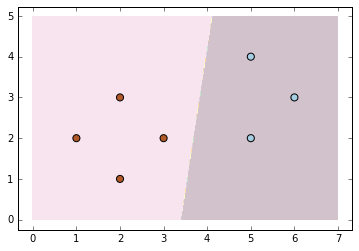

In [21]:
# Vaš kôd ovdje...
#print seven_X
#print seven_y
Logit_reg = sklearn.linear_model.LogisticRegression(C=100)
#print Logit_reg
Logit_reg.fit(seven_X,seven_y)
print  Logit_reg.intercept_, Logit_reg.coef_, Logit_reg.n_iter_
print sklearn.metrics.log_loss(seven_y,Logit_reg.predict_proba(seven_X))
print Logit_reg.predict(seven_X)
mlutils.plot_2d_clf_problem(seven_X,seven_y,h=lambda x: Logit_reg.predict(x)>=0)

### 4. Analiza logističke regresije

#### (a)

Provjerite kako se logistička nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

[ 4.42115373] [[-1.56698565  0.48882939]] [6]
0.120733260714


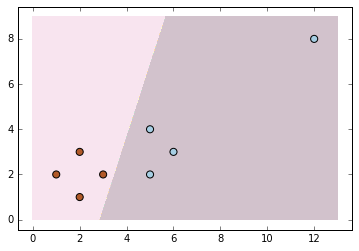

In [22]:
# Vaš kôd ovdje...
#print outlier_X
#print outlier_y
Logit_reg_classificator = sklearn.linear_model.LogisticRegression(C=17)
Logit_reg_classificator.fit(outlier_X,outlier_y)
print  Logit_reg_classificator.intercept_, Logit_reg_classificator.coef_, Logit_reg_classificator.n_iter_
print sklearn.metrics.log_loss(outlier_y,Logit_reg_classificator.predict_proba(outlier_X))
#print Logit_reg_classificator.predict_proba(outlier_X)
mlutils.plot_2d_clf_problem(outlier_X,outlier_y,h=lambda x:Logit_reg_classificator.predict(x)>=0)

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


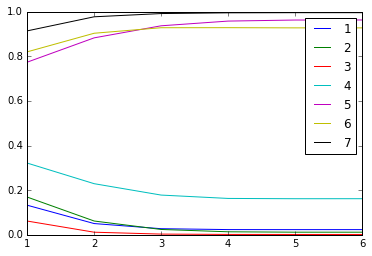

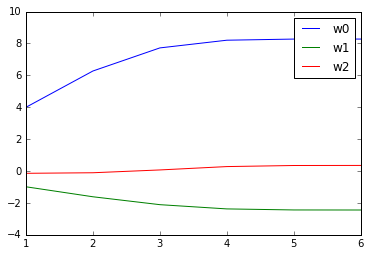

In [42]:
# Vaš kôd ovdje...
#print seven_X
#print seven_y
max_iter_ = 1
h_X = list()
w = list()
while True:
    Logit_reg = sklearn.linear_model.LogisticRegression(max_iter=max_iter_ ,C=100)
    Logit_reg.fit(seven_X,seven_y)
    if (max_iter_>Logit_reg.n_iter_):
        break
    h_X.append(Logit_reg.predict_proba(seven_X))
    w.append(tuple([Logit_reg.intercept_[0],Logit_reg.coef_[0][0],Logit_reg.coef_[0][1]]))
    max_iter_+=1
#print h_X
#print w
x_os = range(1,max_iter_)
for i in range(len(h_X[0])):
    y_os = list()
    #y_os2 = list()
    for j in x_os:
        y_os.append(h_X[j-1][i][0])
        #y_os2.append(h_X[j-1][i][1])
    plt.plot(x_os,y_os,label=str(i+1))
    #plt.plot(x_os,y_os2,label=str(i+1))
plt.legend(loc=1)
plt.show()

for i in range(len(w[0])):
    y_os = list()
    for j in x_os:
        y_os.append(w[j-1][i])
    plt.plot(x_os,y_os,label="w"+str(i))
plt.legend(loc=1)
plt.show()
#mlutils.plot_2d_clf_problem(seven_X,seven_y,h=lambda x: Logit_reg.predict(x)>=0)

#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

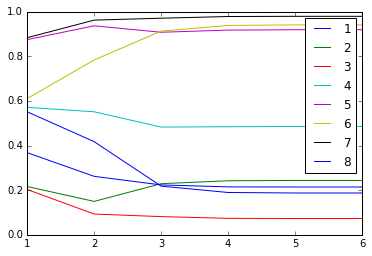

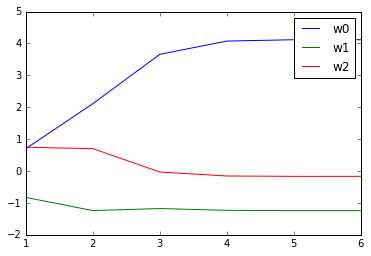

In [44]:
# Vaš kôd ovdje...
max_iter_ = 1
h_X = list()
w = list()
while True:
    Logit_reg = sklearn.linear_model.LogisticRegression(max_iter=max_iter_ ,C=100)
    Logit_reg.fit(unsep_X,unsep_y)
    if (max_iter_>Logit_reg.n_iter_):
        break
    h_X.append(Logit_reg.predict_proba(unsep_X))
    w.append(tuple([Logit_reg.intercept_[0],Logit_reg.coef_[0][0],Logit_reg.coef_[0][1]]))
    max_iter_+=1
#print h_X
#print w
#print np.shape(h_X)
x_os = range(1,max_iter_)
for i in range(len(h_X[0])):
    y_os = list()
    #y_os2 = list()
    for j in x_os:
        y_os.append(h_X[j-1][i][0])
        #y_os2.append(h_X[j-1][i][1])
    plt.plot(x_os,y_os,label=str(i+1))
    #plt.plot(x_os,y_os2,label=str(i+1))
plt.legend(loc=1)
plt.show()

for i in range(len(w[0])):
    y_os = list()
    for j in x_os:
        y_os.append(w[j-1][i])
    plt.plot(x_os,y_os,label="w"+str(i))
plt.legend(loc=1)
plt.show()
#mlutils.plot_2d_clf_problem(unsep_X,unsep_y,h=lambda x: Logit_reg.predict(x)>=0)

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

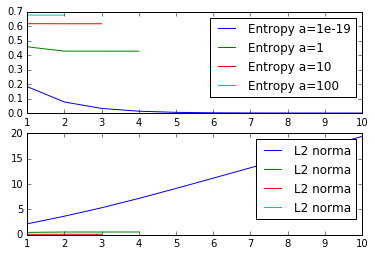

In [25]:
# Vaš kôd ovdje...
alphas = list([1e-19,1,10,100])
for alpha in alphas:
    max_iter_ = 1
    w_l2 = list()
    entropy_error = list()
    while True:
        Logit_reg = sklearn.linear_model.LogisticRegression(max_iter = max_iter_ , C=1./alpha)
        Logit_reg.fit(seven_X,seven_y)
        if max_iter_ > Logit_reg.n_iter_:
            break
        predicted = [proba[1] for proba in Logit_reg.predict_proba(seven_X)]
        entropy_error.append(sklearn.metrics.log_loss(seven_y,predicted))
        w_l2.append((Logit_reg.intercept_[0]**2 + Logit_reg.coef_[0][0]**2 + Logit_reg.coef_[0][1]**2)**0.5/2.)
        max_iter_ += 1
    #print entropy_error
    x_os = range(1,max_iter_)
    plt.subplot(211)
    plt.plot(x_os,entropy_error,label='Entropy a='+str(alpha))
    plt.subplot(212)
    plt.plot(x_os,w_l2,label="L2 norma")
plt.subplot(211)
plt.legend(loc=1)
plt.subplot(212)
plt.legend(loc=1)
plt.show()

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

#### (a)

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u drugoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [26]:
from sklearn.preprocessing import PolynomialFeatures

#poly = PolynomialFeatures(2)
#...
#mlutils.plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

(100, 2) (100,)


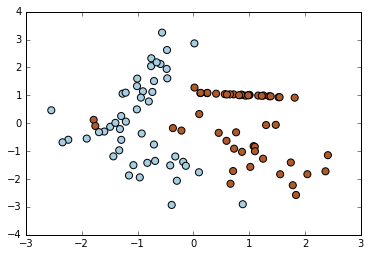

In [27]:
X, Y = make_classification(n_features=2, n_redundant=0,
                             n_clusters_per_class=2, n_classes=2)
print np.shape(X),np.shape(Y)
mlutils.plot_2d_clf_problem(X,Y)
show()

Stupanj polinomije -> 2  Stopa regularizacije -> 1e-19
0.0860427471925


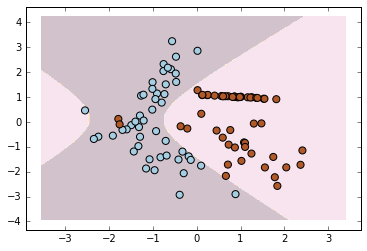

Stupanj polinomije -> 2  Stopa regularizacije -> 1.0
0.155679636518


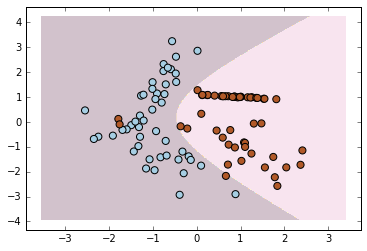

Stupanj polinomije -> 2  Stopa regularizacije -> 10.0
0.284712146476


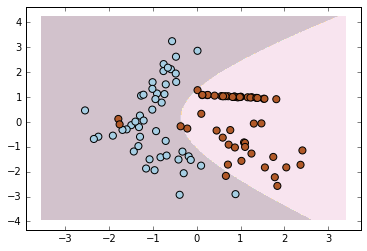

Stupanj polinomije -> 2  Stopa regularizacije -> 100.0
0.533674863369


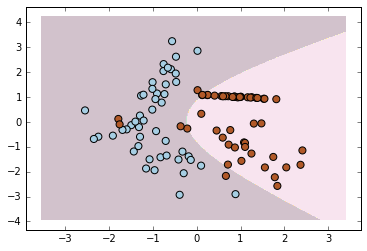

Stupanj polinomije -> 3  Stopa regularizacije -> 1e-19
0.000724174570498


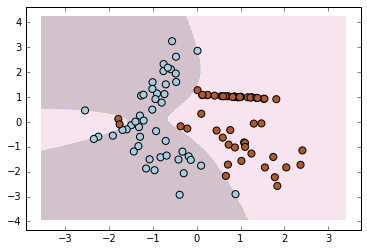

Stupanj polinomije -> 3  Stopa regularizacije -> 1.0
0.123244167132


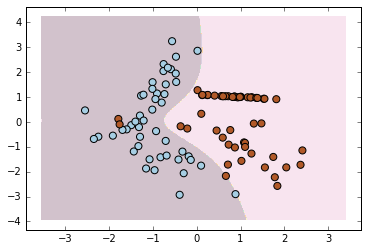

Stupanj polinomije -> 3  Stopa regularizacije -> 10.0
0.232485827382


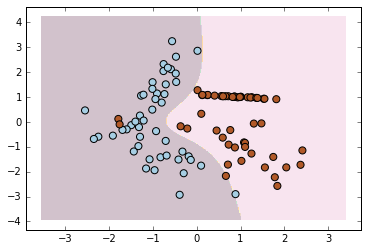

Stupanj polinomije -> 3  Stopa regularizacije -> 100.0
0.406098629104


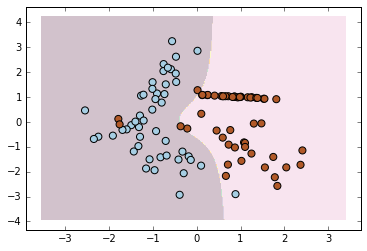

In [30]:
# Vaš kôd ovdje...
for i in range(2,4):
    poly = PolynomialFeatures(i)
    for alpha in [1e-19,1.,10.,100.]:
        Logit_reg = sklearn.linear_model.LogisticRegression(C=1./alpha)
        Logit_reg.fit(poly.fit_transform(X),Y)
        print "Stupanj polinomije ->",i," Stopa regularizacije ->",alpha
        error = sklearn.metrics.log_loss(Y,Logit_reg.predict_proba(poly.fit_transform(X)))
        print error
        mlutils.plot_2d_clf_problem(X, Y, lambda x : Logit_reg.predict(poly.transform(x)))
        show()

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?

#### (b)

Podijelite skup podataka iz zadatka (a) na **skup za treniranje** i **skup za ispitivanje** u omjeru 7:3 (možete koristiti funkciju [`cross_validation.train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html). Na skupu za učenje trenirajte model logističke regresije s polinomom četvrtog stupnja ($d=4$) kao funkcijom preslikavanja. Prikažite empirijsku pogrešku i pogrešku generalizacije u ovisnosti o faktoru regularizacije, i to kao funkciju parametra $C$ (inverz faktora regularizacije) za $C=2^\alpha$, gdje $\alpha\in\{-8,-7,\dots,7,8\}$.

In [34]:
# Vaš kôd ovdje...
from sklearn import cross_validation
x_train, x_test, y_train, y_test = cross_validation.train_test_split(X,Y,test_size=0.7)
print np.shape(x_train), np.shape(x_test), np.shape(y_train), np.shape(y_test)
#mlutils.plot_2d_clf_problem(x_train,y_train)
#show()


(30, 2) (70, 2) (30,) (70,)


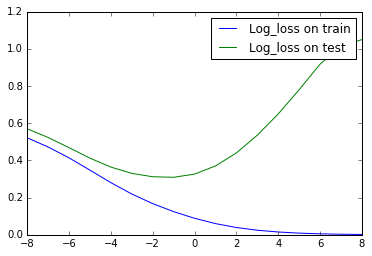

In [35]:
poly = PolynomialFeatures(4)
C = range(-8,9)
E_ = list()
E = list()
G = list()
for alpha in C:
    Logit_reg = sklearn.linear_model.LogisticRegression(C=2**alpha)
    Logit_reg.fit(poly.fit_transform(x_train),y_train)
    predicted = [prob[1] for prob in Logit_reg.predict_proba(poly.fit_transform(x_test))]
    predicted_ = [prob[1] for prob in Logit_reg.predict_proba(poly.fit_transform(x_train))]
    E_.append(sklearn.metrics.log_loss(y_train,predicted_))
    E.append(sklearn.metrics.log_loss(y_test,predicted))
    #G.append(zero_one_loss(y_test,Logit_reg.predict(poly.fit_transform(x_test))))
plt.plot(C,E_,label='Log_loss on train')  
plt.plot(C,E,label='Log_loss on test')
#plt.plot(C,G,label='Zero_one_loss')
plt.legend(loc=1)
plt.show()
#mlutils.plot_2d_clf_problem(x_train,y_train,h=lambda x : Logit_reg.predict(poly.transform(x)))
#show()

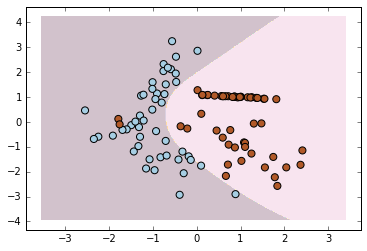

In [37]:
#train model on best case... C = -2
Logit_reg = sklearn.linear_model.LogisticRegression(C=2**-2)
Logit_reg.fit(poly.fit_transform(x_train),y_train)
mlutils.plot_2d_clf_problem(X,Y,h=lambda x : Logit_reg.predict(poly.transform(x)))
show()

**Q:** Kojem dijelu u grafikonu odgovara prenaučenost, a kojem podnaučenost? Zašto?

**Q:** Koji biste faktor $\alpha$ odabrali i zašto?